<a href="https://colab.research.google.com/github/Bharathreddymukkamalla/House-price-prediction/blob/main/BostonHousepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [16]:
# Data and math
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor, plot_importance



Data Preprocessing

In [2]:
# Load dataset
house_price_dataset = fetch_openml(name="boston", version=1, as_frame=True)

In [3]:
# Create DataFrame
df = pd.DataFrame(house_price_dataset.data)
df['price'] = house_price_dataset.target

In [4]:
# Shape and missing values
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (506, 14)

Missing values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64


In [6]:
# Fix categorical columns (CHAS, RAD)
for col in df.select_dtypes(['category']).columns:
    df[col] = df[col].astype(int)

In [7]:
# Show first rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Data analysis

In [8]:
# Statistical summary
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


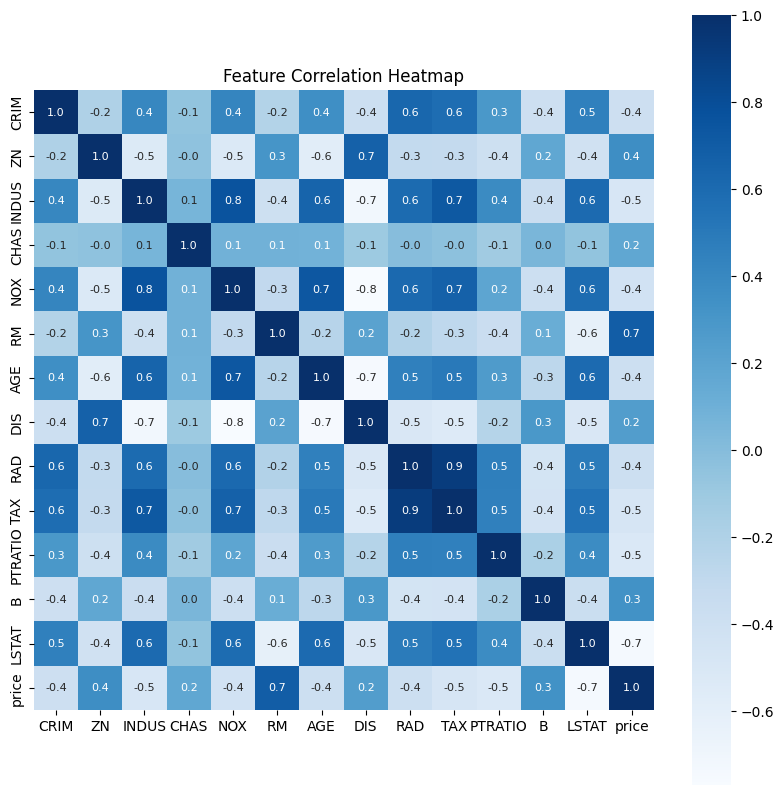

In [9]:
# Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f',
            annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

Feature distrbution

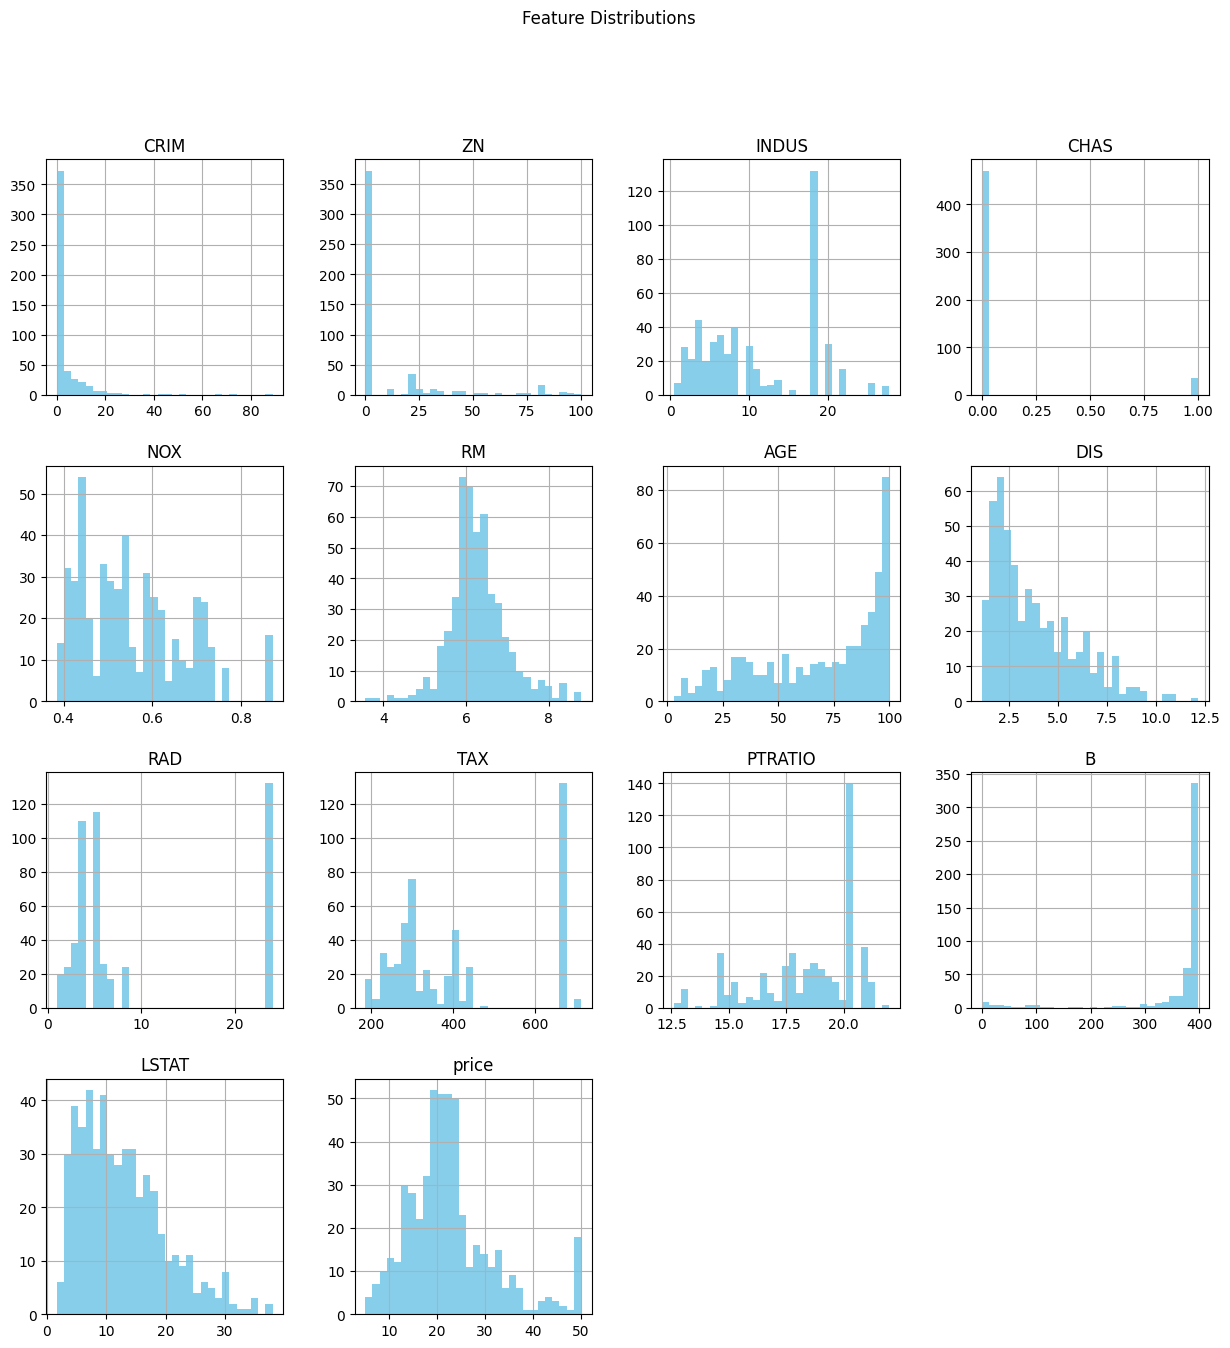

In [17]:
df.hist(bins=30, figsize=(15,15), color='skyblue')
plt.suptitle("Feature Distributions")
plt.show()


Pairplot of Top Correlated Features

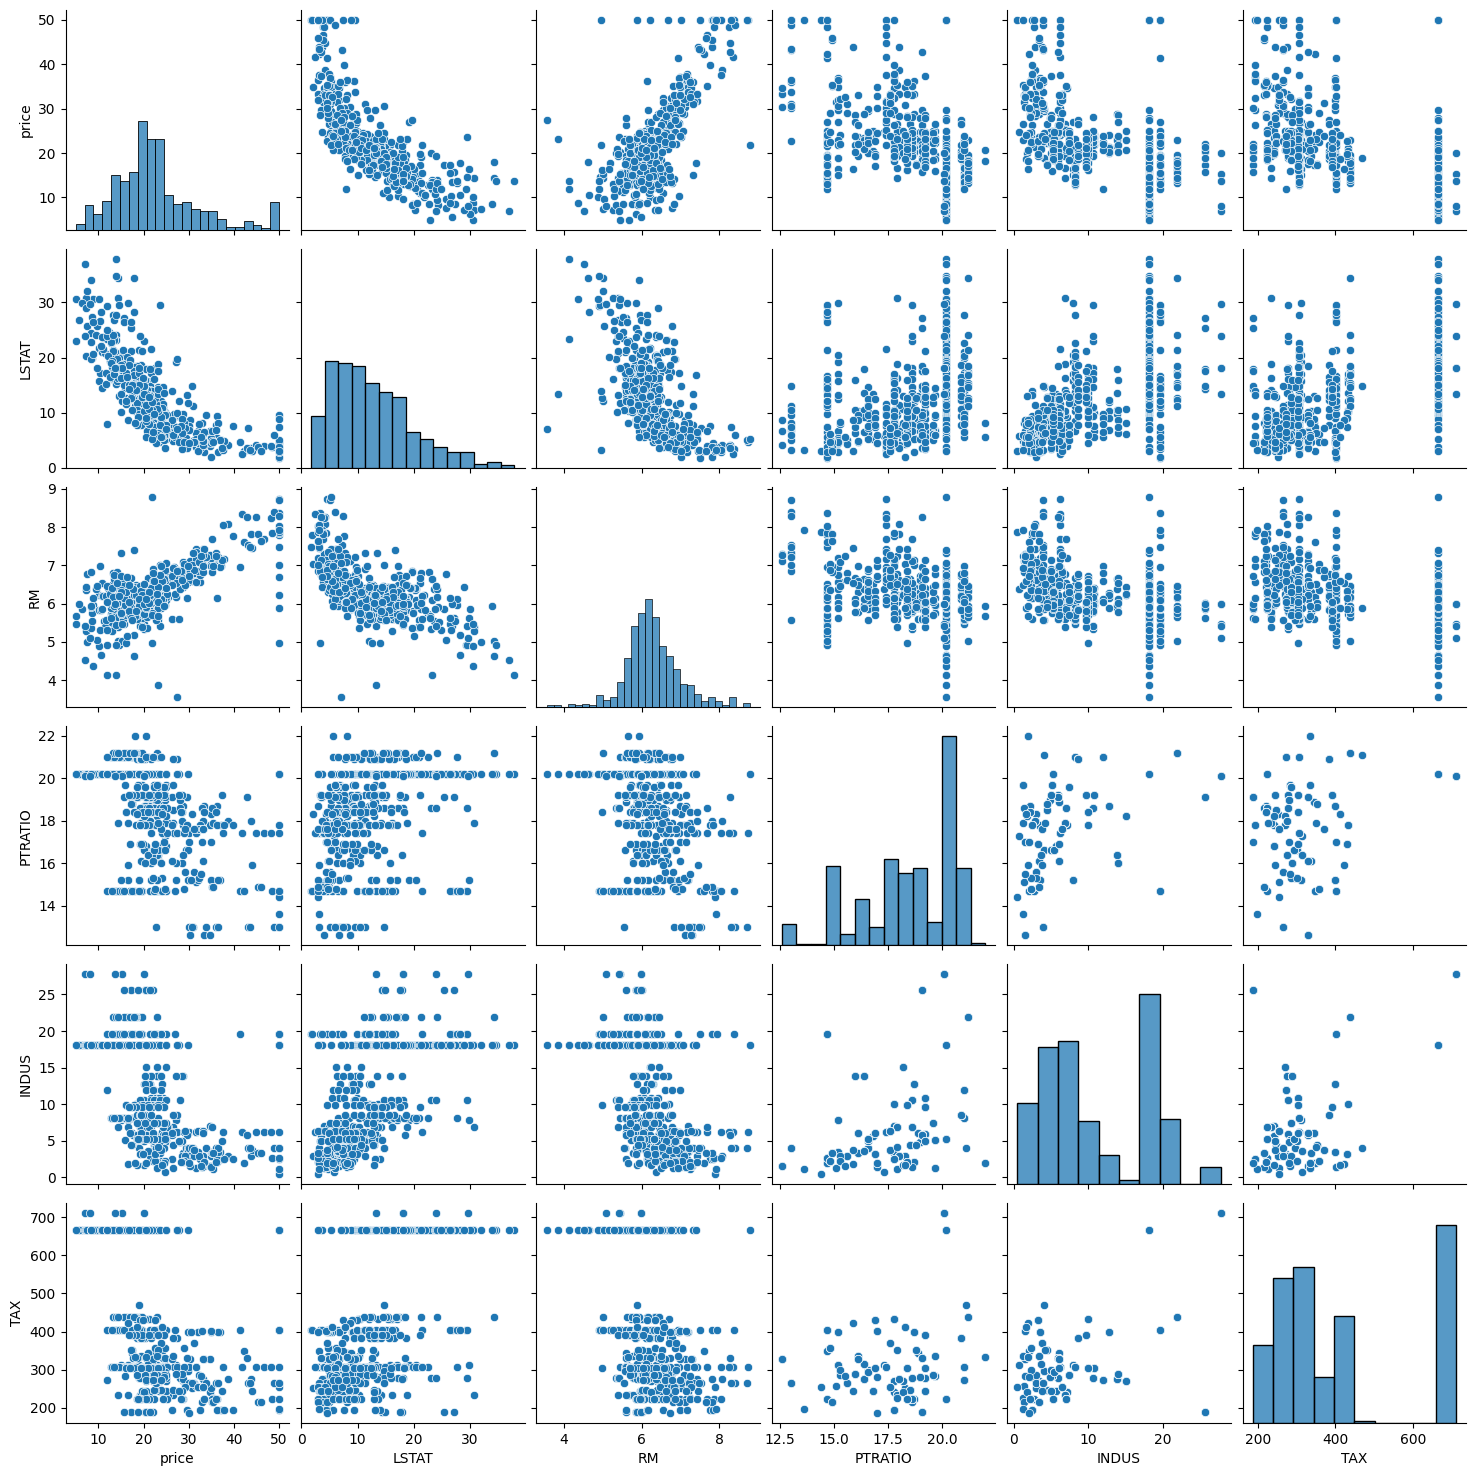

In [18]:
top_corr = df.corr()['price'].abs().sort_values(ascending=False).head(6).index
sns.pairplot(df[top_corr])
plt.show()


Train and test split data

In [10]:
X = df.drop(['price'], axis=1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


Train shape: (404, 13)
Test shape: (102, 13)


XGBoostRegrresor

In [11]:
model = XGBRegressor()
model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Model evulation

In [12]:
# Predictions
y_pred = model.predict(x_test)

In [13]:
# Metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Absolute Error: 2.0748727686264927
R2 Score: 0.9051721149855378


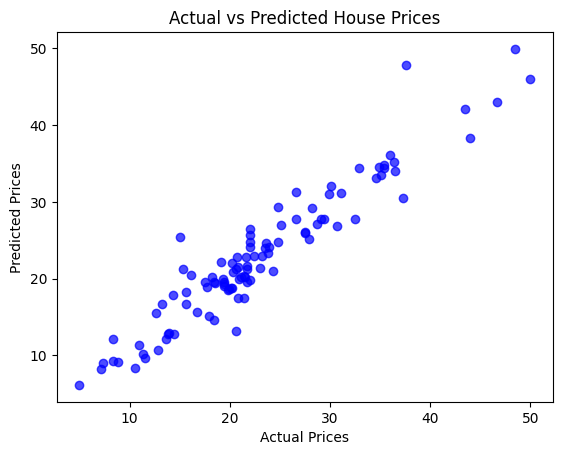

In [14]:
# Actual vs Predicted plot
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

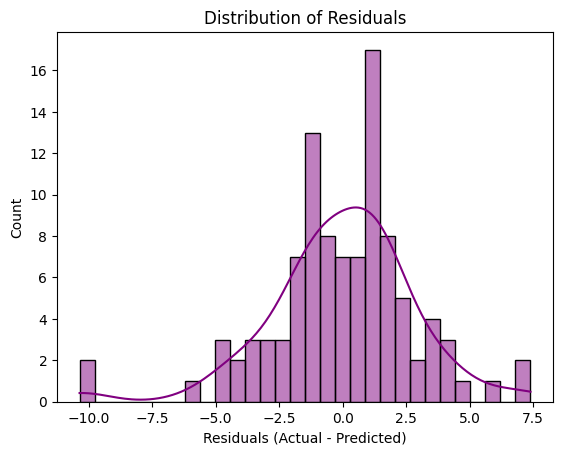

In [15]:
# Residuals distribution
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Distribution of Residuals")
plt.show()